In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv("diamonds.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# EDA

In [3]:
df.shape

(53940, 10)

In [4]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [9]:
df.color.value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [10]:
df.clarity.value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

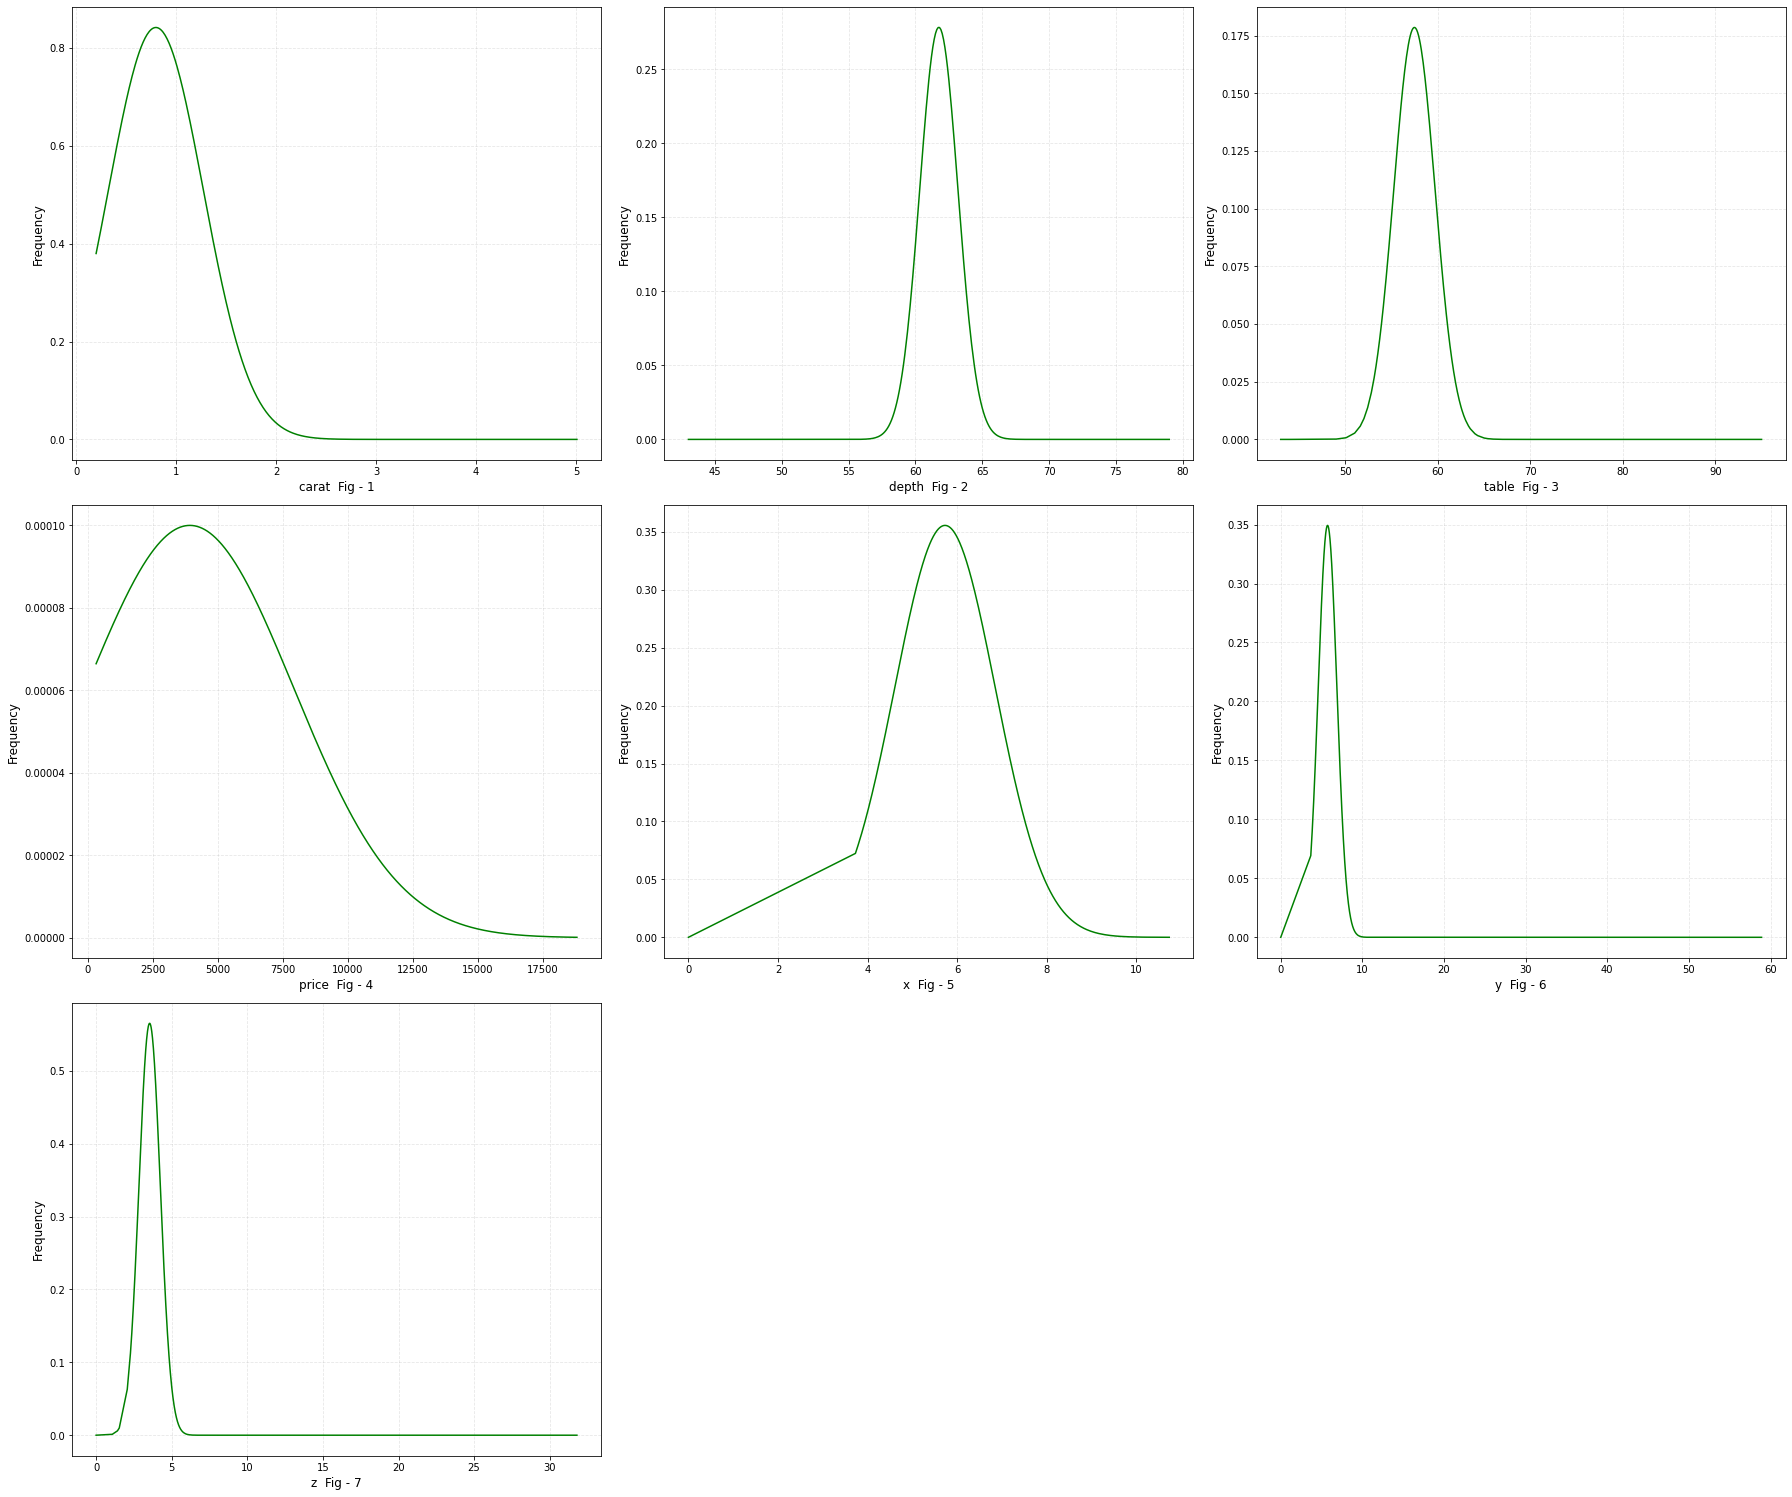

In [11]:
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
plt.figure(figsize = (25, 55))

for i, col, in enumerate(df.describe().columns, 1):
    plt.subplot(8, 3, i)
    t = col + "  Fig - " + str(i)
    pdf = stats.norm.pdf(df[col].sort_values(), np.mean(df[col]), np.std(df[col]))
    plt.plot(df[col].sort_values(), pdf, color = 'g')
    plt.xlabel(t, size=12)    
    plt.ylabel("Frequency", size=12)                
    plt.grid(True, alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()

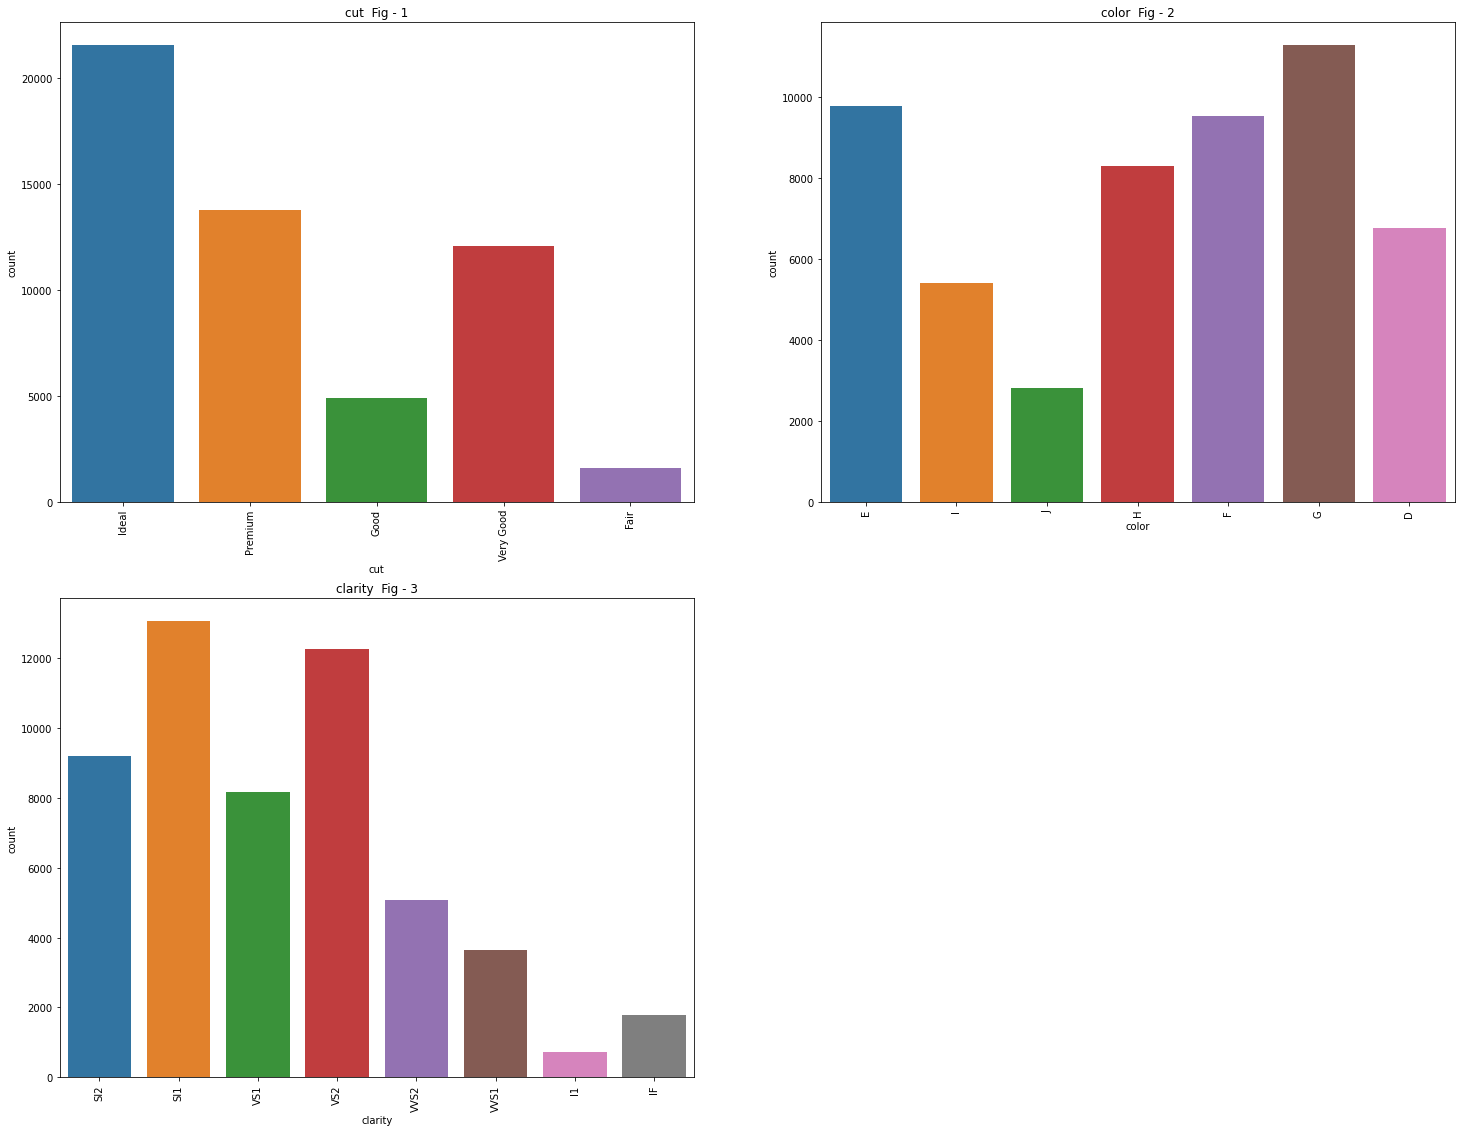

In [12]:
plt.figure(figsize = (25, 30))

for i, col, in enumerate(df.select_dtypes(include = "object"), 1):
    plt.subplot(3, 2, i)
    plt.xticks(rotation = 90)
    t = col + "  Fig - " + str(i)
    sns.countplot(df[col]).set(title = t)

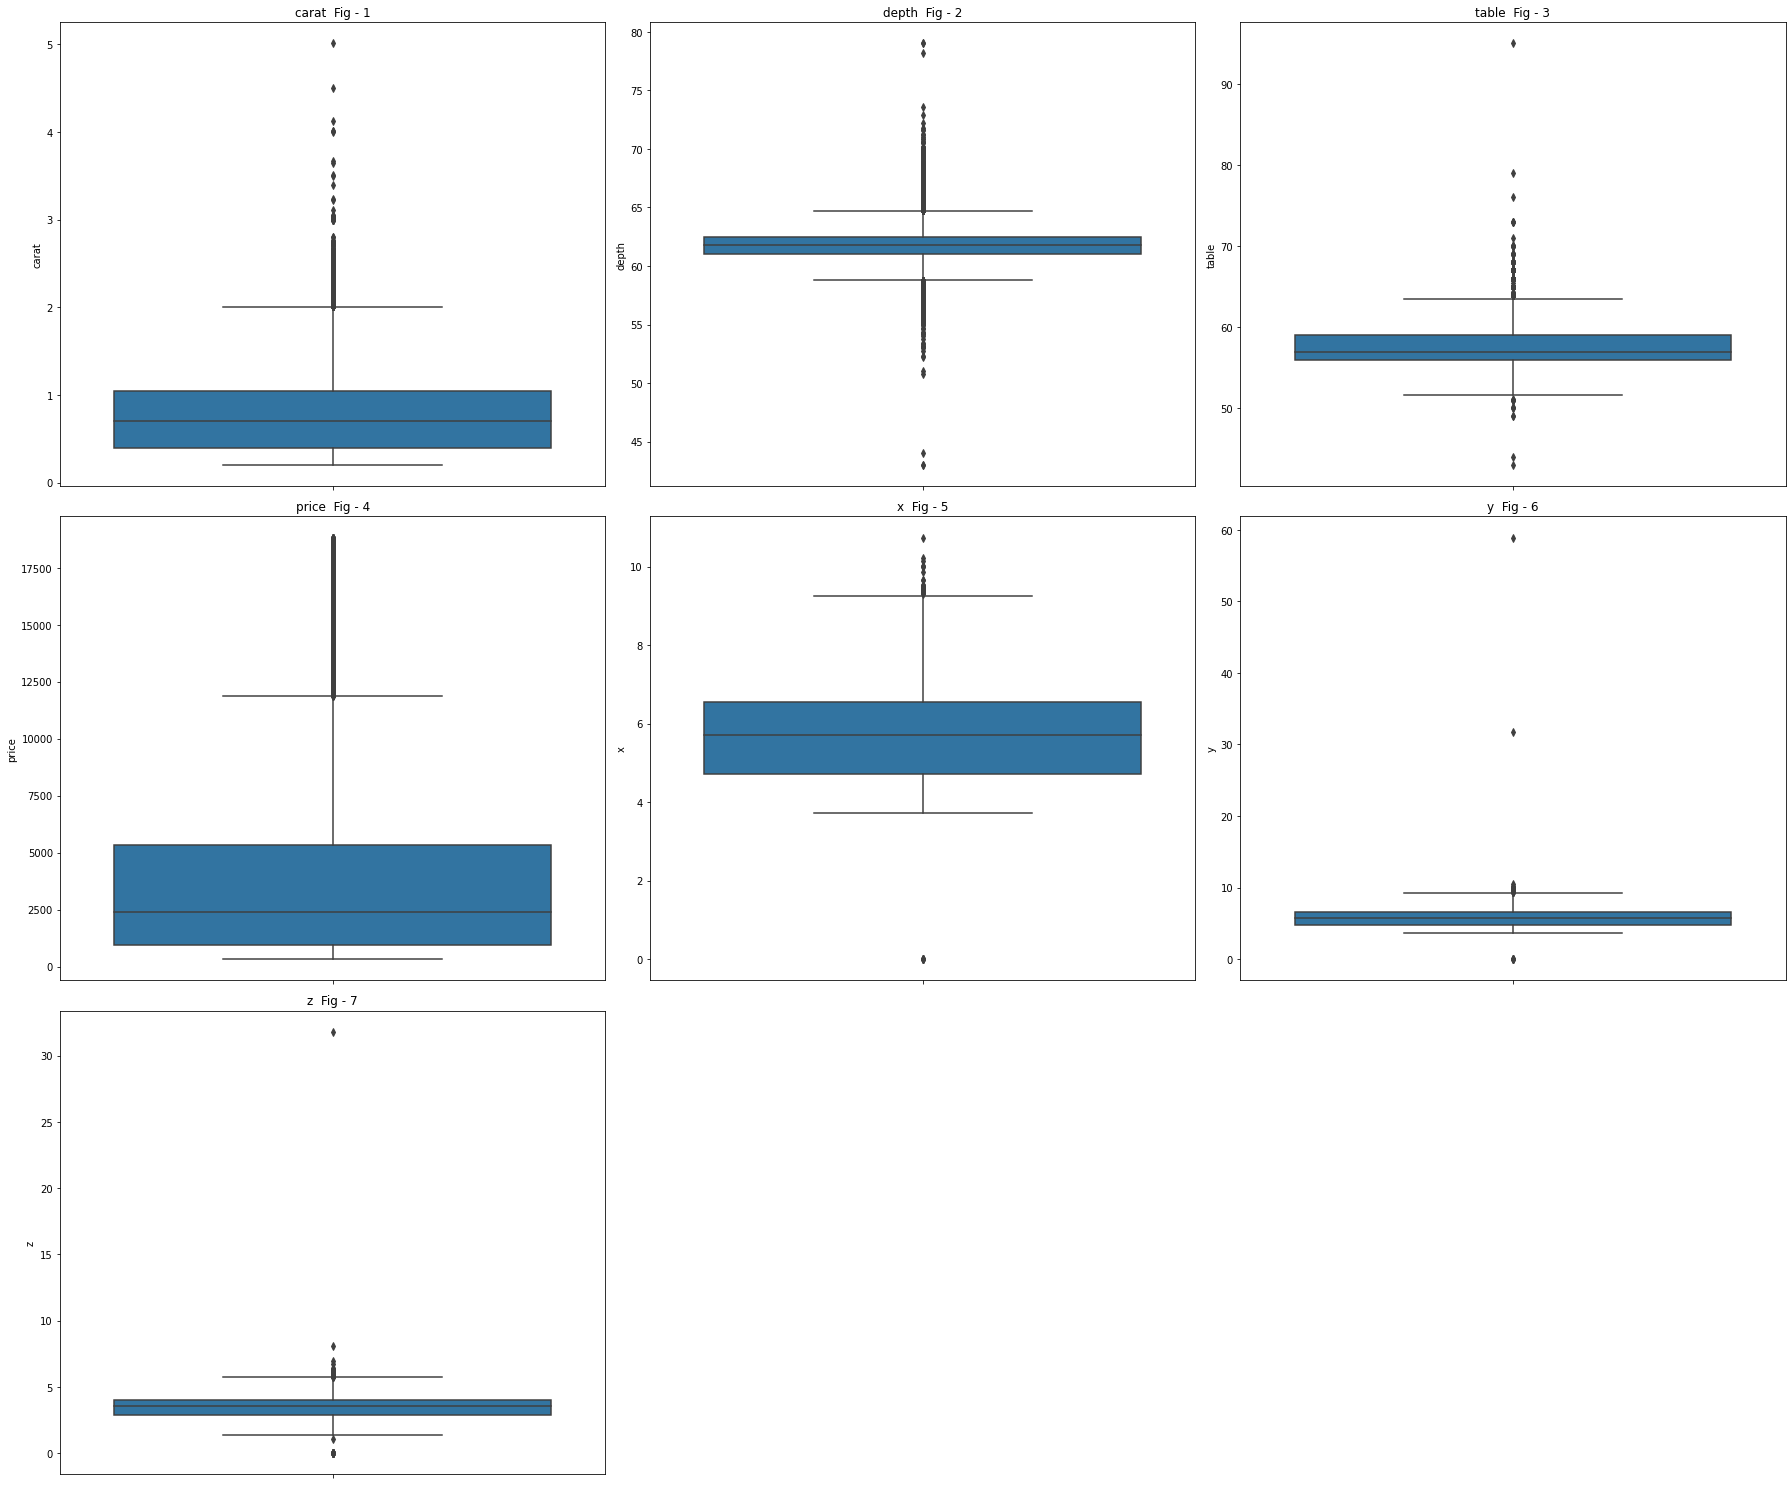

In [13]:
plt.figure(figsize = (25, 55))

for i, col, in enumerate(df.describe().columns, 1):
    plt.subplot(8, 3, i)
    t = col + "  Fig - " + str(i)
    sns.boxplot(y = df[col]).set(title = t)
plt.tight_layout()
plt.show()

#### Handling outliers

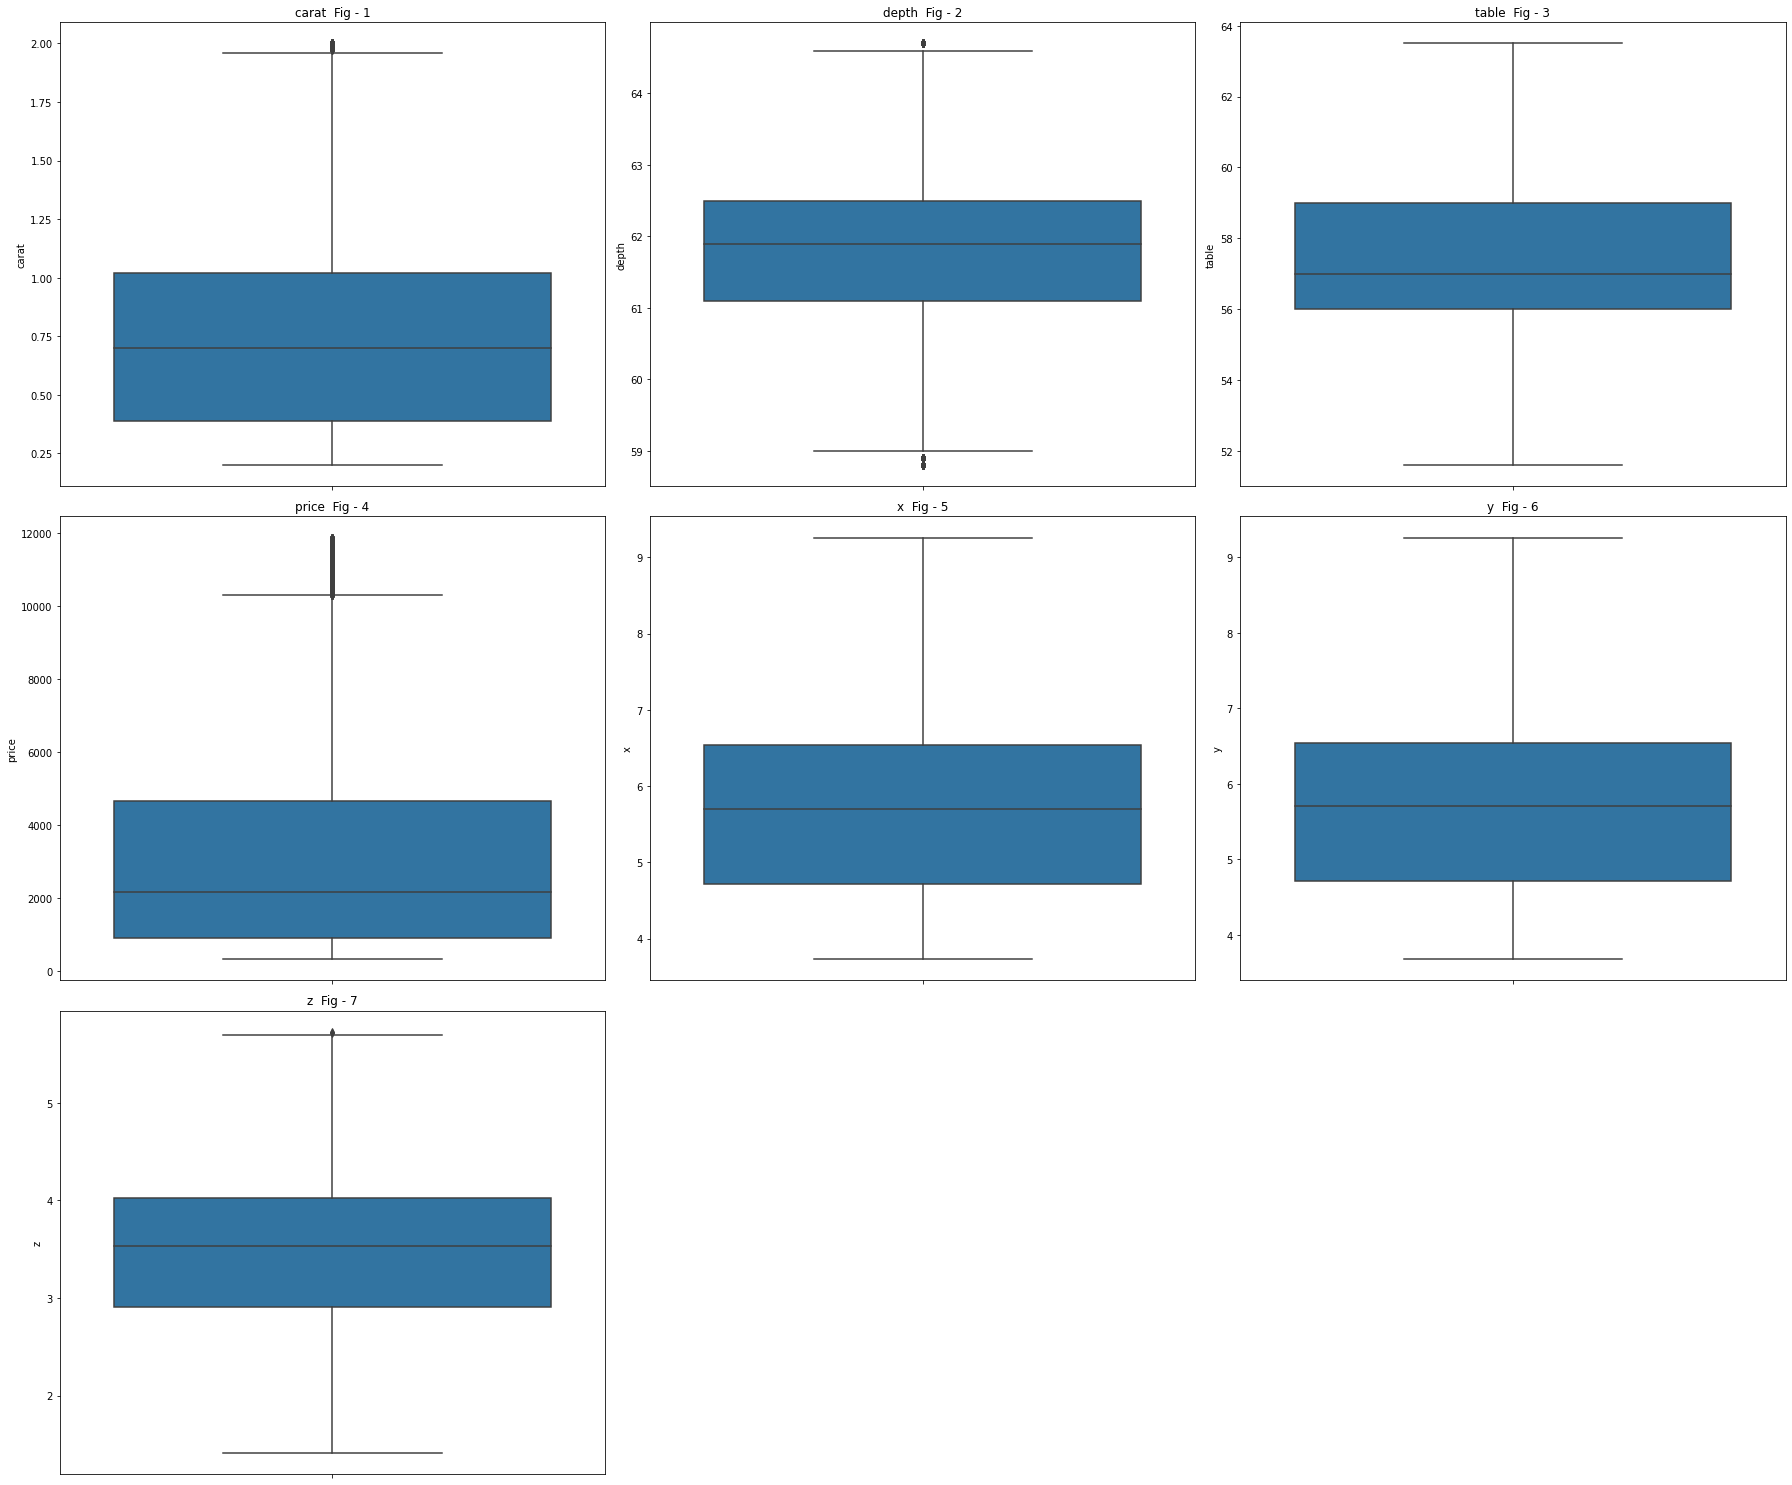

In [14]:
# detecting outliers with inter-quantile-range (IQR)
outliers = list()
def get_outliers(df, col):
    
    sorted(col) # sorting columns to get 25th and 75th percentile (like we do in median which is 50th percentile)
    Q1,Q3 = np.percentile(col , [25,75])
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)

    return lower, upper

plt.figure(figsize = (25, 55))

for i, col, in enumerate(df.describe().columns, 1):
    plt.subplot(8, 3, i)
    title = col + "  Fig - " + str(i)
    l, u = get_outliers(df, df[col])
    t = df[(df[col] < l) | (df[col] > u)]
    df_o = df.drop(t.index)
    sns.boxplot(y = df_o[col]).set(title = title)
plt.tight_layout()
plt.show()

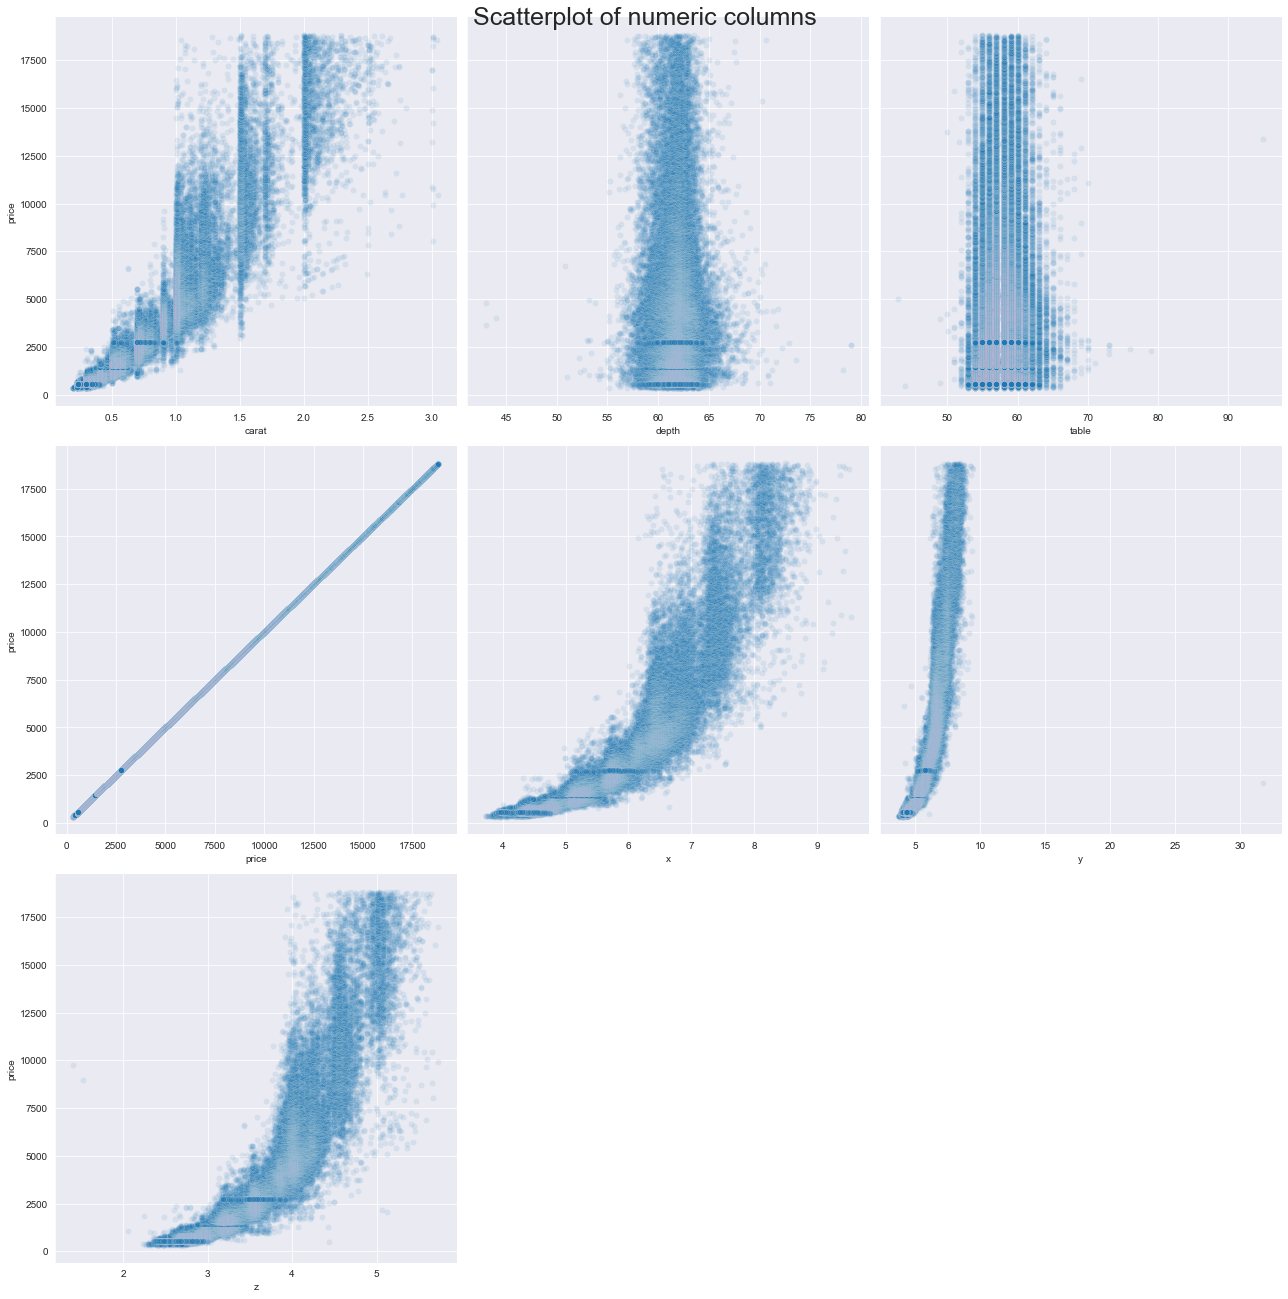

In [15]:
# plotting scatter plots
# Only plotting numeric columns against our response variable

sns.set_style("darkgrid")

numeric_cols = df_o[df_o.describe().columns]
g = sns.FacetGrid(pd.DataFrame(numeric_cols.columns), col = 0, col_wrap = 3, sharex = False, size = 6)
for ax, feature_col in zip(g.axes, numeric_cols):
    sns.scatterplot(data = numeric_cols, x = feature_col, y = "price", ax = ax, alpha = 0.1)

g.tight_layout()
plt.suptitle("Scatterplot of numeric columns", fontsize = 25, y = 1)

plt.show()

In [16]:
df_o.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.023728,0.182577,0.923195,0.978860,0.972742,0.977318
depth,0.023728,1.000000,-0.296064,-0.012985,-0.027922,-0.030846,0.093720
table,0.182577,-0.296064,1.000000,0.127213,0.196413,0.188777,0.156187
price,0.923195,-0.012985,0.127213,1.000000,0.887008,0.883874,0.882015
x,0.978860,-0.027922,0.196413,0.887008,1.000000,0.993340,0.991198
y,0.972742,-0.030846,0.188777,0.883874,0.993340,1.000000,0.986840
z,0.977318,0.093720,0.156187,0.882015,0.991198,0.986840,1.000000


# Splitting the data

In [17]:
from sklearn.model_selection import train_test_split
X = df_o.drop("price", axis = 1)
y = df_o["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 8)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40418, 9), (13473, 9), (40418,), (13473,))

# Encoding (Data-Preprocessing)

In [18]:
# pre-processing train-data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for X_train_cat_cols in X_train.select_dtypes(include = "object"):
    X_train[X_train_cat_cols] = label_encoder.fit_transform(X_train[X_train_cat_cols])

print(X_train.head())

       carat  cut  color  clarity  depth  table     x     y     z
24155   2.02    2      4        2   62.3   56.0  8.11  8.06  5.04
9067    1.02    4      4        2   58.4   62.0  6.55  6.61  3.84
25693   0.40    2      1        3   62.6   54.0  4.68  4.71  2.94
40139   0.70    0      3        0   64.6   59.0  5.64  5.48  3.60
41215   0.40    2      2        6   61.5   56.0  4.77  4.73  2.92


#### Reason to opt LabelEncoder(): 

It's viable to apply LabelEncoder than One-Hot-Encoding because we are dealing with ordinal qualitative data-type not nominal data-type.

In [19]:
# pre-processing test-data
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for X_test_cat_cols in X_test.select_dtypes(include = "object"):
    X_test[X_test_cat_cols] = label_encoder.fit_transform(X_test[X_test_cat_cols])

print(X_test.head())

       carat  cut  color  clarity  depth  table     x     y     z
38082   0.36    2      1        5   61.2   56.0  4.63  4.59  2.82
40906   0.55    4      6        5   62.9   54.0  5.23  5.29  3.31
13760   1.20    4      3        3   63.1   57.0  6.68  6.79  4.25
51852   0.70    2      0        3   60.3   56.0  5.77  5.73  3.47
48908   0.54    2      3        6   61.3   56.0  5.25  5.27  3.23


# Scaling (Data-Preprocessing)

In [20]:
# normalizing data with linear-scaling in train-data

for col in X_train.describe().columns:
    X_train[col+"_scaled"] = (X_train[col] - X_train[col].min()) / (X_train[col].max() - X_train[col].min())
    X_train.drop(col, inplace = True, axis = 1)

print(X_train.head())

y_train = (y_train - np.min(y_train)) / (np.max(y_train) - np.min(y_train))

       carat_scaled  cut_scaled  color_scaled  clarity_scaled  depth_scaled  \
24155      0.640845         0.5      0.666667        0.285714      0.522857   
9067       0.288732         1.0      0.666667        0.285714      0.411429   
25693      0.070423         0.5      0.166667        0.428571      0.531429   
40139      0.176056         0.0      0.500000        0.000000      0.588571   
41215      0.070423         0.5      0.333333        0.857143      0.500000   

       table_scaled  x_scaled  y_scaled  z_scaled  
24155      0.235294  0.757785  0.155761  0.840278  
9067       0.352941  0.487889  0.104196  0.562500  
25693      0.196078  0.164360  0.036629  0.354167  
40139      0.294118  0.330450  0.064011  0.506944  
41215      0.235294  0.179931  0.037340  0.349537  


In [21]:
# normalizing data with linear-scaling in test-data

for col in X_test.describe().columns:
    X_test[col+"_scaled"] = (X_test[col] - X_test[col].min()) / (X_test[col].max() - X_test[col].min())
    X_test.drop(col, inplace = True, axis = 1)

print(X_test.head())

y_test = (y_test - np.min(y_test)) / (np.max(y_test) - np.min(y_test))

       carat_scaled  cut_scaled  color_scaled  clarity_scaled  depth_scaled  \
38082      0.056140         0.5      0.166667        0.714286      0.505556   
40906      0.122807         1.0      1.000000        0.714286      0.552778   
13760      0.350877         1.0      0.500000        0.428571      0.558333   
51852      0.175439         0.5      0.000000        0.428571      0.480556   
48908      0.119298         0.5      0.500000        0.857143      0.508333   

       table_scaled  x_scaled  y_scaled  z_scaled  
38082      0.361111  0.146087  0.146168  0.211111  
40906      0.305556  0.250435  0.270945  0.347222  
13760      0.388889  0.502609  0.538324  0.608333  
51852      0.361111  0.344348  0.349376  0.391667  
48908      0.361111  0.253913  0.267380  0.325000  


# KNN (Scratch)

In [22]:
dist = np.zeros(y_test.shape)
y_pred_scratch = np.zeros(y_test.shape)

k = 10
for i in range(len(X_test)):
    dist = np.sqrt(((X_test.iloc[i] - X_train) ** 2).sum(axis = 1))
    sorted_vals = np.argsort(dist)[:k]
    y_pred_scratch[i] = y_train.iloc[sorted_vals].mean()

# Evaluate KNN (Scratch) Model

In [23]:
from sklearn.metrics import r2_score

knn_scratch = r2_score(y_test, y_pred_scratch)
print(knn_scratch)

0.9637284179670424


# KNN (sklearn)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor(n_neighbors = 10)
regressor.fit(X_train, y_train);

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("RMSE :", mse ** 0.5)

RMSE : 0.04116231669938514


In [27]:
print("Training Accuracy :", regressor.score(X_train, y_train) * 100, "%")
print("Test Accuracy :", regressor.score(X_test, y_test) * 100, "%")

Training Accuracy : 97.62042187623159 %
Test Accuracy : 96.37285560492359 %


In [28]:
print("KNN (Scratch) Accuracy:", knn_scratch * 100, "%")
print("KNN (sklearn) Accuracy:", regressor.score(X_test, y_test) * 100, "%")

KNN (Scratch) Accuracy: 96.37284179670425 %
KNN (sklearn) Accuracy: 96.37285560492359 %


## We can observe that KNN implementation from scratch has almost same accuracy as of sklearn's implementation